In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Introduction

#### a.
What is the effect of number of bedrooms on house price?

#### b. 
Real estate developers or companies that build and sell houses would find it useful in planning the number of bedrooms to build to make more profit.

#### c. 
Hedonic model is one of the most popular models used in housing market analysis. The Hedonic theory states that a property's physical characteristics and location affect its value (Goodman A., 1977). The hedonic model uses multiple regression analysis to study the effect of a house's size, age, number of rooms, and plot or garden size. Here, I would focus mainly on the causual effect of number of bedrroms on house price.

Reference:
Goodman, Allen C. "Hedonic prices, price indices and housing markets." Journal of urban economics 5, no. 4 (1978): 471-484.

## Data

#### a. 
The source of my data is Beacon and qPublic.net (beacon.schneidercorp.com). This public access portal provides public records from local government on housing market. I have downloaded the data of sale price, lot area, finished living area, and number of bedrooms of houses sold in the Story County, Iowa within the last 12 months and imported them into Excel worksheet.

In [2]:
data = pd.read_csv("data.csv")
data

,sale_price,lot_area,finished_living_area,bedrooms
0,2865000,11341,2603,4.0
1,1700000,31655,0,0.0
2,1200000,66366,6057,6.0
3,1068838,55844,5149,6.0
4,899900,23100,4914,8.0
...,...,...,...,...
992,0,16200,2826,5.0
993,0,11708,3678,4.0
994,0,10880,1591,3.0
995,0,10192,1500,3.0


#### b. 
I have removed outliers from my data. Specifically, I have removed houses that have 0s or negative values in their attributes, and the house that has an extremely high sale price. Also, I have removed houses that have missing values.

In [3]:
market = data.drop(data[data["sale_price"] <= 0].index)
market = market.drop(market[market["sale_price"] == 2865000].index)           ## remove outlier
market = market.drop(market[market["lot_area"] <= 0].index)
market = market.drop(market[market["finished_living_area"] <= 0].index)
market = market.drop(market[market["bedrooms"] <= 0].index)
market = market.dropna()                                                      ## remove missing values
market

,sale_price,lot_area,finished_living_area,bedrooms
2,1200000,66366,6057,6.0
3,1068838,55844,5149,6.0
4,899900,23100,4914,8.0
5,899900,23100,1274,5.0
7,801000,281833,4012,4.0
...,...,...,...,...
713,40000,10152,1178,3.0
715,25000,7200,913,2.0
722,2455,9558,1616,3.0
723,900,10400,2836,5.0


#### c.
I did not append any other datasets. The only transformation I did on the data after downloading is removing the dollar sign of house sales price which was done in Excel.

#### d.
Comprehensive summary statistics

In [4]:
print (market.describe())

         sale_price       lot_area  finished_living_area    bedrooms
count  6.570000e+02     657.000000            657.000000  657.000000
mean   2.919442e+05   12023.436834           2009.471842    3.550989
std    1.384816e+05   14157.699208            863.753603    0.986604
min    6.100000e+02    3500.000000            352.000000    1.000000
25%    2.050000e+05    8450.000000           1412.000000    3.000000
50%    2.575000e+05   10005.000000           1824.000000    3.000000
75%    3.500000e+05   11887.000000           2522.000000    4.000000
max    1.200000e+06  281833.000000           6312.000000    8.000000


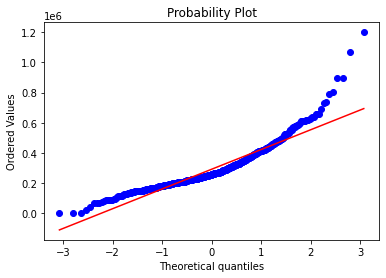

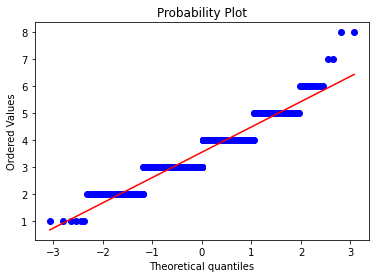

In [5]:
##check normality of sale price
stats.probplot(market["sale_price"], dist="norm", plot=pylab)
pylab.show()
##check normality of number of bedrooms
stats.probplot(market["bedrooms"], dist="norm", plot=pylab)
pylab.show()

Since most of the data fall along the straight line at a 45-degree angle in both Q-Q plots, the main variables of this project (sale_price and bedrooms) are normally distributed.

## Modeling

In [6]:
## 1. Only study the relationship between house sales price and number of bedrooms

Y = market["sale_price"]
X = market["bedrooms"]
X = sm.add_constant(X)
mod = sm.OLS(Y,X)
res_1 = mod.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     160.4
Date:                Thu, 05 May 2022   Prob (F-statistic):           4.87e-33
Time:                        08:38:40   Log-Likelihood:                -8637.7
No. Observations:                 657   AIC:                         1.728e+04
Df Residuals:                     655   BIC:                         1.729e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.088e+04   1.81e+04      3.913      0.0

C:\Users\hwb07\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
## 2. Study the relationship between house sales price and number of bedrooms while 
## controlling the area of the house

Y = market["sale_price"]
X = market[["bedrooms", "lot_area", "finished_living_area"]]
X = sm.add_constant(X)
mod = sm.OLS(Y,X)
res_2 = mod.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     277.2
Date:                Thu, 05 May 2022   Prob (F-statistic):          5.46e-116
Time:                        08:38:40   Log-Likelihood:                -8439.9
No. Observations:                 657   AIC:                         1.689e+04
Df Residuals:                     653   BIC:                         1.691e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.283e+04 

C:\Users\hwb07\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Findings

#### a. 
In the first model, the coefficient of number of bedrooms is statistically significant as its p-value is smaller than 0.05. However, the value of adjusted R-squared indicates that this model only explains 19.5% of the variance of house sales price.

In the second model, the coefficient of number of bedrooms becomes statistically insignificant as its p-value is greater than 0.05. Since its value of adjusted R-squared has increased and this model explains 55.8% of the variance of house sales price, the second model outperforms the previous one.

#### b.
Yes, they are robust to different model specifications

## Conclusion

#### a. 
Although we would care about how many bedrooms there are in the house if we were going to buy one, the result shows that the number of bedrooms would become unimportant when we take the total area of the house into consideration. So for real estate developers, it is more important to maximize the area of each house than to plan the housing layout or room arrangement.

#### b.
Questions that could be answered in the future are like what should real estate developers care the most when they are going to buy a land or property if they want to maximize profit, or factors that affect house price.